In [8]:
import os
import PyPDF2
import fitz

In [12]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [9]:
dir = 'annoted_sustainability_reports/Healthcare'
 

In [97]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:

        highlights = []
        annot = page.first_annot
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next

        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
        

    s = ""
        
    for r in result:
        if r is not None:
            s += r
        
    #create array of highlighted sentences in the pdf
#     highlighted_sentences = s.split('.')
    highlighted_sentences = tokenize.sent_tokenize(s)

    print(highlighted_sentences, "\n", len(highlighted_sentences))

    rel_text.append(highlighted_sentences)

    num_highlighted = len(highlighted_sentences)

    highlight_list.append(num_highlighted)


annoted_sustainability_reports/Healthcare/EliLilly_2021_Environmental_ESG_report.pdf
Document('annoted_sustainability_reports/Healthcare/EliLilly_2021_Environmental_ESG_report.pdf')
['From 2012 to 2020, we achieved a 26% reduction in absolute emissions.', 'In 2021, we achieved a 9% absolute emissions reduction versus 2020.', 'This reduction was partially driven by energy e�ciency improvements and an increase in the use of renewable electricity including the startup of our solar array in Kinsale.', 'In 2021, 9.6% of our purchased electricity came from renewable sources.', 'A large portion of this renewable electricity is delivered through our utility providers to our sites in Alcobendas, Spain; Kinsale, Ireland; and Bracknell, UK.In 2021, we reduced our energy consumption by 2.9%,In 2021, 9.6% of our purchased electricity was secured from renewable sources.', 'We have reduced GHG emissions at key facilities by leveraging solar energy.', 'These projects include: Kinsale – In July, 2021, 

['Throughout 2021, absolute Scope 1 and 2 emissions production increased by 3.3% compared to 2020.', 'When adjusted for sales, Scope 1 and 2 emissions decreased 17% over this same time period.', 'More than 200 metric tons CO2e annual reduction were realized by installing a boiler oxygen management system in our three steam boilers.', 'Another project to upgrade cooling-tower fins, louvres and in-fills resulted in an annual reduction of about 250 metric tons CO2e.', 'This switch also resulted in a financial saving, plus an environmental benefit of an annual GHG emission reduction of about 20 metric tons.', 'In 2021, we purchased 190 million kWh of low-carbon and renewable energy, resulting in savings of 80,000 metric tons of CO2e.', 'In addition, we also generated 1.8 million kWh from solar installations at eight of our sites.Scope 1 and 2 Carbon Emissions Intensity\xa0— Normalized to Sales Metric Tons CO2e per $ Million Sales Scope 1 and 2 Carbon Emissions 1,000 Metric Tons CO2e Scope 

In [87]:
#Extracting all sentences from the file
sentences_list = []
all_text = []


for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    pdfFileObj = open(f,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    t = ""
        
    for count in range(len(fitz.open(f))):
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        
    pdfFileObj.close() 
#     total_sentences = t.split('.')
    total_sentences = tokenize.sent_tokenize(t)
    print(len(total_sentences))

    all_text.append(total_sentences)

    num_sentences = len(total_sentences)

    sentences_list.append(num_sentences)

#1910 total sentences in Amazon_2021_sustainability_report.pdf


annoted_sustainability_reports/Healthcare/EliLilly_2021_Environmental_ESG_report.pdf
94
annoted_sustainability_reports/Healthcare/UnitedHealthGroup_2021-sustainability-report.pdf
721
annoted_sustainability_reports/Healthcare/Merck_2021_ESG_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


1874
annoted_sustainability_reports/Healthcare/BristolMyersSquibb_2020_ESG.pdf
1051
annoted_sustainability_reports/Healthcare/Danaher_2021_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


720
annoted_sustainability_reports/Healthcare/johnsonandjohnson_2021-health-for-humanity-report-pdf.pdf
1653
annoted_sustainability_reports/Healthcare/Pfizer_NetZero_2022_update.pdf
45
annoted_sustainability_reports/Healthcare/Abbott_2021_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


1687
annoted_sustainability_reports/Healthcare/ThermoFisherScientifiic_2021_CSR_report.pdf
747
annoted_sustainability_reports/Healthcare/Amgen_2021_ESG_report.pdf
1204


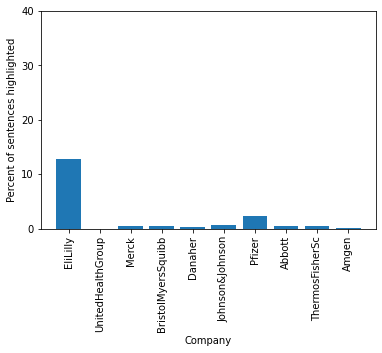

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["EliLilly", "UnitedHealthGroup", "Merck", "BristolMyersSquibb", "Danaher", "Johnson&Johnson", 
     "Pfizer", "Abbott", "ThermosFisherSc", "Amgen"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [89]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      1.771187
std       3.912557
min       0.000000
25%       0.303481
50%       0.420916
75%       0.587589
max      12.765957
dtype: float64

In [152]:
#storing variable so they can be called between notebooks (for ML and aggregate work later on)

HC_reltext = rel_text
HC_alltext = all_text

%store HC_reltext
%store HC_alltext

Stored 'HC_reltext' (list)
Stored 'HC_alltext' (list)


In [154]:
def extract_sentences(text):
    sentences = []
    for report in text:
        for sent in report:
            sentences.append(sent)
    return sentences

In [157]:
pd.DataFrame(extract_sentences(HC_reltext)).to_csv("HC_reltext.csv", encoding = 'utf-8-sig')

In [158]:
pd.DataFrame(extract_sentences(HC_alltext)).to_csv("HC_alltext.csv", encoding = 'utf-8-sig')